<a href="https://colab.research.google.com/github/godsesaurab/data-science-projects/blob/main/4.%20Sales%20Forecast%20Prediction/Sales%20Forecast%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Forecast Prediction

Sales forecasting is an important aspect of business planning, helping organizations predict future sales and make informed decisions about inventory management, marketing strategies and resource allocation.

Sales forecasting involves estimating current or future sales based on data trends.

## 1. Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 2. Loading the Dataset

In [3]:
file_url = 'https://media.geeksforgeeks.org/wp-content/uploads/20250408123407596371/train.csv'
data = pd.read_csv(file_url)

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## 3. Data Preprocessing and Visualization

In [8]:
data['Order Date'] = pd.to_datetime(data['Order Date'],format='%d/%m/%Y')

sales_by_date = data.groupby('Order Date')['Sales'].sum().reset_index()
sales_by_date.head()

,Order Date,Sales
0,2015-01-03,16.448
1,2015-01-04,288.060
2,2015-01-05,19.536
3,2015-01-06,4407.100
4,2015-01-07,87.158


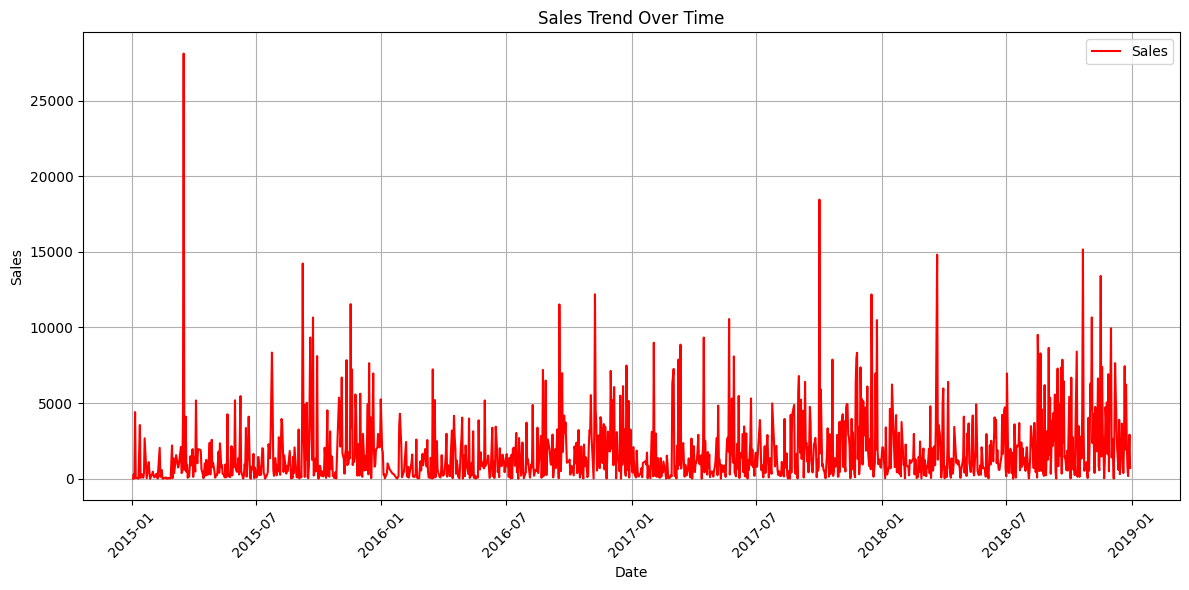

In [11]:
plt.figure(figsize=(12,6))
plt.plot(sales_by_date['Order Date'],sales_by_date['Sales'],label='Sales',color='red')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Feature Engineering - Creating Lagged feature

In [15]:
def create_lagged_features(data, lag=1):
  lagged_data = data.copy()
  for i in range(1, lag+1):
    lagged_data[f'lag_{i}'] = lagged_data['Sales'].shift(i)
  return lagged_data

lag = 5

sales_with_lags = create_lagged_features(data[['Order Date','Sales']],lag)
sales_with_lags = sales_with_lags.dropna()
sales_with_lags.head()

,Order Date,Sales,lag_1,lag_2,lag_3,lag_4,lag_5
5,2015-06-09,48.860,22.368,957.5775,14.6200,731.9400,261.9600
6,2015-06-09,7.280,48.860,22.3680,957.5775,14.6200,731.9400
7,2015-06-09,907.152,7.280,48.8600,22.3680,957.5775,14.6200
8,2015-06-09,18.504,907.152,7.2800,48.8600,22.3680,957.5775
9,2015-06-09,114.900,18.504,907.1520,7.2800,48.8600,22.3680


## 5. Preparing the Data for Training

In [19]:
X = sales_with_lags.drop(columns=['Sales','Order Date'],axis=1)
Y = sales_with_lags['Sales']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, shuffle=False)

## 6. Training the XGBoost Model

In [21]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=100,learning_rate=0.1,max_depth=5)
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 7. Making predictions and Evaluating the Model

In [23]:
y_pred = model_xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE : {rmse_xgb:.2f}')

RMSE : 734.63


The RMSE of 734.63 indicates the average deviation between the actual and predicted sales values. A lower RMSE value signifies better model accuracy, with the model's predictions being closer to the actual sales data. As we have large amount of sales data this RMSE score is accptable.

## 8. Visualizing Results

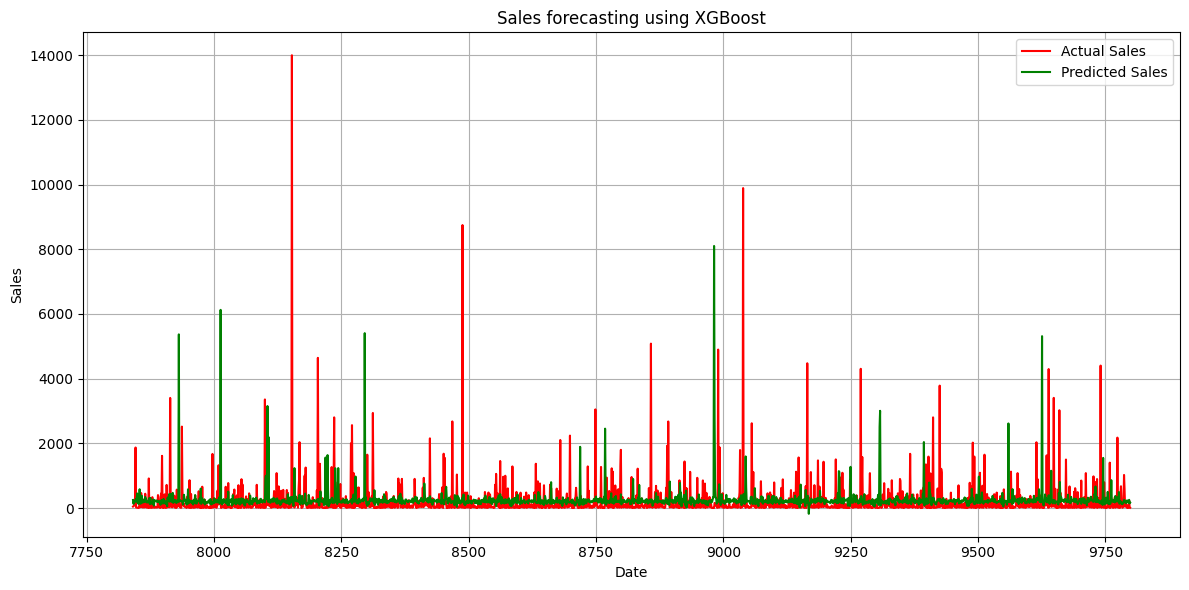

In [24]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Sales', color='red')
plt.plot(y_test.index,y_pred,label='Predicted Sales', color='green')
plt.title('Sales forecasting using XGBoost')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

As we can see the predicted and actual values are quite close to each other this proves the efficiency of our model. Sales forecasting using machine learning models like XGBoost can significantly enhance the accuracy of predictions by capturing temporal patterns in historical data. It can be used for improving sales predictions helping businesses optimize inventory, pricing and demand planning.